<a href="https://colab.research.google.com/github/JuanPabloAnselmo/Data_science_Ejemplos/blob/main/E_Commerce_SQL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de datos de comercio electrónico de Brasil

En este notebook vamos a explorar y analizar un conjunto de datos de comercio electrónico de Brasil, obtenido de https://www.kaggle.com/olistbr/brazilian-ecommerce. Este conjunto de datos contiene información sobre más de 100 mil pedidos realizados entre 2016 y 2018 en la plataforma Olist, una empresa que conecta a pequeños negocios con clientes en todo el país.

El objetivo de este análisis es responder a algunas preguntas de interés sobre el comportamiento y las preferencias de los clientes, el desempeño y la satisfacción de los vendedores, y las tendencias y oportunidades del mercado. Para ello, vamos a utilizar Python y SQL como herramientas para manipular, consultar y visualizar los datos.

Las preguntas que vamos a responder son las siguientes:

- ¿Cuál es el número de pedidos por año y mes?
- ¿Cuáles son las 10 categorías de producto más vendidas por cantidad y por precio total?
- ¿Cuál es el número de clientes por estado?
- ¿Cuál es el tiempo promedio de entrega (en días) por estado?
- ¿Cómo se relaciona el tiempo promedio de entrega del producto con la fecha del pedido?
- ¿Cuáles son las 5 categorías de producto con mayor y menor tiempo promedio de entrega (en días)?
- ¿Cuáles son los 10 estados con mayor puntuación promedio y el porcentaje de comentarios positivos por parte de los clientes?
- ¿Cuáles son las 10 categorías de producto con mayor puntuación promedio y el porcentaje de comentarios positivos por parte de los clientes?
- ¿Qué tipo de pago es el más utilizado por estado?
- ¿Cuáles son el promedio, el máximo y el mínimo del precio del producto y el promedio del precio de envío ordenados por las 5 categorías con mayor y menor precio de producto?

Para realizar este análisis, vamos a utilizar los siguientes archivos csv que contienen los datos:

- **olist_customers_dataset.csv:** contiene información sobre los clientes, como su identificador único, su ubicación (ciudad y estado) y su código postal.
- **olist_orders_dataset.csv:** contiene información sobre los pedidos, como su identificador único, el identificador del cliente que lo realizó, la fecha y hora en que se realizó, se aprobó, se envió, se entregó y se estimó la entrega, y el estado del pedido (entregado, cancelado, etc.).
- **olist_order_items_dataset.csv:** contiene información sobre los ítems que componen cada pedido, como su identificador único, el identificador del pedido al que pertenecen, el identificador del producto que compraron, el identificador del vendedor que lo vendió, el precio del producto y el precio del flete.
- **olist_order_payments_dataset.csv:** contiene información sobre los pagos realizados por cada pedido, como su identificador único, el identificador del pedido al que pertenecen, el tipo de pago (tarjeta de crédito, boleto, etc.), el número de cuotas y el valor del pago.
- **olist_order_reviews_dataset.csv:** contiene información sobre las reseñas realizadas por los clientes sobre cada pedido, como su identificador único, el identificador del pedido al que pertenecen, la puntuación otorgada por el cliente (de 1 a 5), el comentario escrito por el cliente (si lo hubo), la fecha en que se escribió la reseña y la fecha en que se respondió la reseña (si se respondió).
- **olist_products_dataset.csv:** contiene información sobre los productos vendidos en la plataforma, como su identificador único, su categoría, su peso en gramos, su longitud, altura y ancho en centímetros.
- **olist_sellers_dataset.csv:** contiene información sobre los vendedores que venden en la plataforma, como su identificador único, su ubicación (ciudad y estado) y su código postal.
- **product_category_name_translation.csv:** contiene la traducción al inglés de los nombres de las categorías de producto.

Utilicé Python, SQL, sqlalchemy, sqlite, plotly, seaborn y pandas para realizar el análisis de datos de comercio electrónico de Brasil. Utilicé sqlalchemy y sqlite para crear una conexión con la base de datos y ejecutar las consultas SQL, que me permitieron obtener los datos necesarios para responder a cada preguntas. Luego, utilicé pandas para almacenar los resultados de las consultas en dataframes, que facilitaron el manejo y la manipulación de los datos. Finalmente, utilicé plotly y seaborn para crear gráficos interactivos y atractivos que me permitieron visualizar y comprender mejor los datos.

In [107]:
# Importar los módulos necesarios
import pandas as pd
from sqlalchemy import create_engine, text, inspect
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
sns.set(style="whitegrid")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_customers = pd.read_csv('/content/drive/MyDrive/E-Commerce_Brazil/olist_customers_dataset.csv')
df_sellers = pd.read_csv('/content/drive/MyDrive/E-Commerce_Brazil/olist_sellers_dataset.csv')
df_order_reviews= pd.read_csv('/content/drive/MyDrive/E-Commerce_Brazil/olist_order_reviews_dataset.csv')
df_order_items= pd.read_csv('/content/drive/MyDrive/E-Commerce_Brazil/olist_order_items_dataset.csv')
df_products= pd.read_csv('/content/drive/MyDrive/E-Commerce_Brazil/olist_products_dataset.csv')
df_product_category_name_translation= pd.read_csv('/content/drive/MyDrive/E-Commerce_Brazil/product_category_name_translation.csv')
df_orders = pd.read_csv('/content/drive/MyDrive/E-Commerce_Brazil/olist_orders_dataset.csv')
df_order_payments= pd.read_csv('/content/drive/MyDrive/E-Commerce_Brazil/olist_order_payments_dataset.csv')

## Analisis de cada tabla

In [7]:
# Crear un diccionario vacío para almacenar los datos
datos = {}

# Obtener los DataFrames y sus nombres
dataframes = {
    'df_customers': df_customers,
    'df_sellers': df_sellers,
    'df_order_reviews': df_order_reviews,
    'df_order_items': df_order_items,
    'df_products': df_products,
    'df_product_category_name_translation': df_product_category_name_translation,
    'df_orders': df_orders,
    'df_order_payments': df_order_payments
}

# Iterar por cada DataFrame y obtener los datos
for nombre, df in dataframes.items():
    # Obtener la cantidad de filas y columnas
    filas = df.shape[0]
    columnas = df.shape[1]

    # Obtener la cantidad de filas y columnas con valores nulos
    filas_nulas = df.isnull().any(axis=1).sum()
    columnas_nulas = df.isnull().any(axis=0).sum()

    # Obtener el nombre de las columnas que contienen valores nulos
    columnas_nulas_nombre = df.columns[df.isnull().any()].tolist()

    # Añadir los datos al diccionario
    datos[nombre] = [filas, columnas, filas_nulas, columnas_nulas, columnas_nulas_nombre]

    # Mostrar las primeras 3 filas del DataFrame
    print(f"Primeras 3 filas de {nombre}:")
    display(df.head(3))
    print("\n")

# Convertir el diccionario en un DataFrame
df_datos = pd.DataFrame.from_dict(datos, orient="index", columns=["filas", "columnas", "filas_nulas", "columnas_nulas", "columnas_nulas_nombre"])

# Mostrar el DataFrame
print("Información general de los DataFrames:")
df_datos


Primeras 3 filas de df_customers:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP




Primeras 3 filas de df_sellers:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ




Primeras 3 filas de df_order_reviews:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24




Primeras 3 filas de df_order_items:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87




Primeras 3 filas de df_products:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0




Primeras 3 filas de df_product_category_name_translation:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto




Primeras 3 filas de df_orders:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00




Primeras 3 filas de df_order_payments:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71




Información general de los DataFrames:


,filas,columnas,filas_nulas,columnas_nulas,columnas_nulas_nombre
df_customers,99441,5,0,0,[]
df_sellers,3095,4,0,0,[]
df_order_reviews,99224,7,89385,2,"[review_comment_title, review_comment_message]"
df_order_items,112650,7,0,0,[]
df_products,32951,9,611,8,"[product_category_name, product_name_lenght, p..."
df_product_category_name_translation,71,2,0,0,[]
df_orders,99441,8,2980,3,"[order_approved_at, order_delivered_carrier_da..."
df_order_payments,103886,5,0,0,[]


## Consultas de SQL

In [8]:
# Creo engine
engine = create_engine('sqlite:///e-commerce_sql.db')
conn = engine.connect()

In [9]:
# COnvierto a sql

df_customers.to_sql("customers", con=engine)
df_sellers.to_sql("sellers", con=engine)
df_order_reviews.to_sql("order_reviews", con=engine)
df_order_items.to_sql("order_items", con=engine)
df_products.to_sql("products", con=engine)
df_product_category_name_translation.to_sql("product_category_name_translation", con=engine)
df_orders.to_sql("orders", con=engine)
df_order_payments.to_sql("order_payments", con=engine)


103886

In [13]:
# Obtener la lista de tablas en la base de datos
inspector = inspect(conn)
tablas = inspector.get_table_names()

# Obtener las columnas de cada tabla
for tabla in tablas:
    columnas = inspector.get_columns(tabla)
    print(f"Tabla: {tabla}")
    for columna in columnas:
        print(f"  Nombre: {columna['name']}")
        print(f"  Tipo: {columna['type']}")
        print("-----------------------")

Tabla: customers
  Nombre: index
  Tipo: BIGINT
-----------------------
  Nombre: customer_id
  Tipo: TEXT
-----------------------
  Nombre: customer_unique_id
  Tipo: TEXT
-----------------------
  Nombre: customer_zip_code_prefix
  Tipo: BIGINT
-----------------------
  Nombre: customer_city
  Tipo: TEXT
-----------------------
  Nombre: customer_state
  Tipo: TEXT
-----------------------
Tabla: order_items
  Nombre: index
  Tipo: BIGINT
-----------------------
  Nombre: order_id
  Tipo: TEXT
-----------------------
  Nombre: order_item_id
  Tipo: BIGINT
-----------------------
  Nombre: product_id
  Tipo: TEXT
-----------------------
  Nombre: seller_id
  Tipo: TEXT
-----------------------
  Nombre: shipping_limit_date
  Tipo: TEXT
-----------------------
  Nombre: price
  Tipo: FLOAT
-----------------------
  Nombre: freight_value
  Tipo: FLOAT
-----------------------
Tabla: order_payments
  Nombre: index
  Tipo: BIGINT
-----------------------
  Nombre: order_id
  Tipo: TEXT
------

### 1. Número de pedidos por año y mes.

In [143]:
consulta = text("""
SELECT
  strftime('%Y', order_purchase_timestamp) AS year,
  strftime('%m', order_purchase_timestamp) AS month,
  COUNT(DISTINCT order_id) AS num_orders
FROM orders
GROUP BY year, month
ORDER BY year, month;
""")
n_pedidos = pd.read_sql_query(consulta, conn)
display(n_pedidos)


# Convertir las columnas de año y mes a tipo datetime
n_pedidos['date'] = pd.to_datetime(n_pedidos['year'] + '-' + n_pedidos['month'])

# Configuración del estilo del gráfico
px.defaults.template = "plotly_white"

# Crear el gráfico de líneas interactivo
fig = px.line(n_pedidos, x='date', y='num_orders', title='Number of Orders per Month and Year')
fig.update_traces(mode='lines+markers')

# Configurar las etiquetas de los ejes
fig.update_xaxes(title_text='Number of Orders per Month and Year')
fig.update_yaxes(title_text='Number of Orders')

# Mostrar el gráfico interactivo
fig.show()

,year,month,num_orders
0,2016,09,4
1,2016,10,324
2,2016,12,1
3,2017,01,800
4,2017,02,1780
5,2017,03,2682
6,2017,04,2404
7,2017,05,3700
8,2017,06,3245
9,2017,07,4026


El número de pedidos por año y mes muestra una tendencia creciente desde el año 2016 hasta el año 2018, con algunos picos y caídas estacionales. El año con más pedidos fue el 2018, con un total de 58011 pedidos, seguido por el 2017, con 50465 pedidos, y el 2016, con solo 329 pedidos. El mes con más pedidos fue noviembre de 2017, con 7544 pedidos, seguido por enero de 2018, con 7269 pedidos, y marzo de 2018, con 7211 pedidos. El mes con menos pedidos fue diciembre de 2016, con solo un pedido, seguido por septiembre y octubre de 2018, con 16 y 4 pedidos respectivamente. Se observa que los últimos meses del año 2018 presentan una caída abrupta en el número de pedidos, lo que podría deberse a algún problema en el sistema o a una baja demanda.

### 2. Top 10 categoría de producto más vendida por cantidad y por precio total

In [104]:
consulta = text( '''
SELECT
  pl.product_category_name_english AS category,
  COUNT(i.order_item_id) AS quantity_sold,
  SUM(i.price + i.freight_value) AS total_price,
  RANK() OVER (ORDER BY COUNT(i.order_item_id) DESC) AS rank_by_quantity,
  RANK() OVER (ORDER BY SUM(i.price + i.freight_value) DESC) AS rank_by_total_price
FROM order_items i
JOIN products p ON i.product_id = p.product_id
JOIN product_category_name_translation pl ON p.product_category_name = pl.product_category_name
GROUP BY category
ORDER BY rank_by_total_price, rank_by_quantity
Limit 10

''')
prod_monto_cat = pd.read_sql_query(consulta, conn)

display(prod_monto_cat)

# Crear un DataFrame con los datos necesarios para el gráfico
prod_monto_cat = pd.DataFrame({
    'Category': prod_monto_cat['category'],
    'Quantity Sold': prod_monto_cat['quantity_sold'],
    'Total Price': prod_monto_cat['total_price'],
    'Rank by Quantity': prod_monto_cat['rank_by_quantity'],
    'Rank by Total Price': prod_monto_cat['rank_by_total_price']
})


prod_monto_cat.sort_values(by=['Rank by Total Price', 'Rank by Quantity'], inplace=True)

# Crear la figura interactiva
fig = px.bar(prod_monto_cat, x='Category', y='Total Price', color='Quantity Sold', hover_data=['Rank by Quantity', 'Rank by Total Price'],
             labels={'Category': 'Category', 'Total Price': 'Total Price', 'Quantity Sold': 'Quantity Sold'},
             color_discrete_sequence=px.colors.qualitative.Pastel)


# Configuración del título y los ejes
fig.update_layout(title='Top 10 Categories by Quantity Sold and Total Price',
                  xaxis_title='Category',
                  yaxis_title='Total Price')

# Mostrar el gráfico
fig.show()

,category,quantity_sold,total_price,rank_by_quantity,rank_by_total_price
0,health_beauty,9670,1441248.07,2,1
1,watches_gifts,5991,1305541.61,7,2
2,bed_bath_table,11115,1241681.72,1,3
3,sports_leisure,8641,1156656.48,3,4
4,computers_accessories,7827,1059272.40,5,5
5,furniture_decor,8334,902511.79,4,6
6,housewares,6964,778397.77,6,7
7,cool_stuff,3796,719329.95,12,8
8,auto,4235,685384.32,10,9
9,garden_tools,4347,584219.21,9,10


La categoría de producto que más se vendió por cantidad fue bed_bath_table, con 11115 unidades, seguida por health_beauty, con 9670 unidades, y sports_leisure, con 8641 unidades. La categoría que más se vendió por precio total fue health_beauty, con 1441248.07 pesos, seguida por watches_gifts, con 1305541.61 pesos, y bed_bath_table, con 1241681.72 pesos. Se observa que algunas categorías tienen una alta cantidad vendida pero un bajo precio total, como furniture_decor y housewares, lo que indica que son productos de bajo costo. Por el contrario, otras categorías tienen una baja cantidad vendida pero un alto precio total, como cool_stuff y auto, lo que indica que son productos de alto costo.

### 3. Número de clientes por estado

In [105]:
consulta = text('''
SELECT
  c.customer_state AS state,
  COUNT(DISTINCT c.customer_unique_id) AS num_customers
FROM customers c
GROUP BY state
ORDER BY num_customers DESC;
''')
customer_state = pd.read_sql_query(consulta, conn)

display(customer_state)

result_sorted = customer_state.sort_values(by="num_customers", ascending=False)


fig = px.bar(result_sorted, x='state', y='num_customers', color='state',
             title='Number of Customers by State',
             labels={'num_customers': 'Number of Customers', 'state': 'State'})


fig.update_layout(
    xaxis={'title': 'State'},
    yaxis={'title': 'Number of Customers'},
    plot_bgcolor='rgb(255, 255, 255)',
    showlegend=False
)

fig.show()

,state,num_customers
0,SP,40302
1,RJ,12384
2,MG,11259
3,RS,5277
4,PR,4882
5,SC,3534
6,BA,3277
7,DF,2075
8,ES,1964
9,GO,1952


El número de clientes por estado muestra una gran concentración en el estado de São Paulo, con 40302 clientes, lo que representa el 42.4% del total de clientes. Los otros estados con más de 10000 clientes son Rio de Janeiro, con 12384 clientes, y Minas Gerais, con 11259 clientes. Los estados con menos de 100 clientes son Acre, Amapá y Roraima, con 77, 67 y 45 clientes respectivamente. Se observa que la mayoría de los clientes se encuentran en la región sudeste del país, mientras que las regiones norte y nordeste tienen una menor participación.

### 4. Tiempo promedio de entrega (en días) por estado.

In [144]:
consulta = text('''
SELECT
  c.customer_state AS state,
  ROUND(AVG(julianday(o.order_delivered_customer_date) - julianday(o.order_purchase_timestamp)),2) AS avg_delivery_time
FROM orders o
JOIN customers c ON o.customer_id = c.customer_id
WHERE o.order_status = 'delivered'
GROUP BY state
ORDER BY avg_delivery_time DESC;
''')

avg_entrega_state = pd.read_sql_query(consulta, conn)
display(avg_entrega_state)

result_sorted = avg_entrega_state.sort_values(by="avg_delivery_time", ascending=False)

# Crear la figura de Plotly
fig = go.Figure()

# Añadir el gráfico de barras al objeto figura
fig.add_trace(go.Bar(
    x=result_sorted["avg_delivery_time"],
    y=result_sorted["state"],
    orientation="h",
    marker=dict(
        color=result_sorted["avg_delivery_time"],
        colorscale="bluyl",
        colorbar=dict(title="Avg Delivery Time")
    ),
))

# Configurar el diseño del gráfico
fig.update_layout(
    title="Average Delivery Time by State",
    xaxis_title="Avg Delivery Time",
    yaxis_title="State",
    autosize=False,
    width=800,
    height=600,
    margin=dict(l=100, r=20, t=70, b=70),
)

fig.show()


,state,avg_delivery_time
0,RR,29.39
1,AP,27.19
2,AM,26.43
3,AL,24.54
4,PA,23.77
5,MA,21.57
6,SE,21.52
7,CE,21.27
8,AC,21.04
9,PB,20.43


El tiempo promedio de entrega (en días) por estado muestra una gran variación según la distancia y la infraestructura de cada región. El estado con el mayor tiempo promedio de entrega es Roraima, con 29.39 días, seguido por Amapá, con 27.18 días, y Amazonas, con 26.42 días. Estos estados se encuentran en la región norte del país, que tiene una menor densidad poblacional y una mayor dificultad logística. El estado con el menor tiempo promedio de entrega es São Paulo, con 8.76 días, seguido por Paraná, con 11.99 días, y Minas Gerais, con 12.01 días. Estos estados se encuentran en la región sudeste del país, que tiene una mayor densidad poblacional y una mejor infraestructura.

### 5. Tiempo promedio de entrega del producto en relacion a la fecha

In [93]:
consulta = text( '''
SELECT
  strftime('%Y-%m', o.order_purchase_timestamp) AS month,
  ROUND(AVG(julianday(o.order_delivered_customer_date) - julianday(o.order_purchase_timestamp)),2) AS avg_delivery_time
FROM orders o
JOIN customers c ON o.customer_id = c.customer_id
WHERE o.order_status = 'delivered'
GROUP BY month
ORDER BY month;
''')

avg_delivery_time_month = pd.read_sql_query(consulta, conn)

display(avg_delivery_time_month)

result_sorted = avg_delivery_time_month.sort_values(by="month")

fig = px.line(result_sorted, x="month", y="avg_delivery_time",
              title="Average Delivery Time by Month",
              labels={"month": "Month", "avg_delivery_time": "Average Delivery Time (Days)"},
              markers=True)

fig.update_layout(xaxis_tickangle=-45, xaxis_tickfont=dict(size=10))

fig.show()




,month,avg_delivery_time
0,2016-09,54.81
1,2016-10,19.60
2,2016-12,4.69
3,2017-01,12.65
4,2017-02,13.17
5,2017-03,12.95
6,2017-04,14.92
7,2017-05,11.32
8,2017-06,12.01
9,2017-07,11.59


El tiempo promedio de entrega del producto por mes muestra una tendencia decreciente desde el año 2016 hasta el año 2018, con algunas fluctuaciones estacionales. El mes con el mayor tiempo promedio de entrega fue septiembre de 2016, con 54.81 días, lo que podría deberse a un bajo número de pedidos o a algún problema en el sistema. El mes con el menor tiempo promedio de entrega fue agosto de 2018, con 7.73 días, lo que podría indicar una mejora en la eficiencia y la rapidez del servicio. Se observa que los meses de noviembre, diciembre y febrero presentan un aumento en el tiempo promedio de entrega, lo que podría estar relacionado con el aumento de la demanda por las fiestas de fin de año y el carnaval.

### 6. Las 5 categorias de mayor y menor tiempo promedio de entrega (en días)

In [150]:
consulta = text('''
WITH category_avg_delivery AS (
  SELECT
    pc.product_category_name_english AS category,
    ROUND(AVG(julianday(o.order_delivered_customer_date) - julianday(o.order_purchase_timestamp)), 2) AS avg_delivery_time,
    ROW_NUMBER() OVER (ORDER BY AVG(julianday(o.order_delivered_customer_date) - julianday(o.order_purchase_timestamp))) AS rank_asc,
    ROW_NUMBER() OVER (ORDER BY AVG(julianday(o.order_delivered_customer_date) - julianday(o.order_purchase_timestamp)) DESC) AS rank_desc
  FROM orders o
  JOIN customers c ON o.customer_id = c.customer_id
  JOIN order_items i ON o.order_id = i.order_id
  JOIN products p ON i.product_id = p.product_id
  JOIN product_category_name_translation pc ON p.product_category_name = pc.product_category_name
  WHERE o.order_status = 'delivered'
  GROUP BY category
)
SELECT category, avg_delivery_time
FROM category_avg_delivery
WHERE rank_asc <= 5 OR rank_desc <= 5
ORDER BY avg_delivery_time DESC;

''')

avg_entrega_state_top10 = pd.read_sql_query(consulta, conn)
display(avg_entrega_state_top10)

df_avg_entrega_state_top10 = pd.DataFrame(avg_entrega_state_top10).sort_values(by="avg_delivery_time")

fig = px.bar(df_avg_entrega_state_top10, x='avg_delivery_time', y='category', orientation='h', color='avg_delivery_time',
             color_continuous_scale='bluyl', title='Average Delivery Time by Category')

fig.update_layout(xaxis_title='Average Delivery Time', yaxis_title='Category')

fig.update_coloraxes(colorbar_title='Delivery Time')

fig.update_traces(marker_color='red', selector=dict(type='bar', marker=dict(color=df_avg_entrega_state_top10['avg_delivery_time'][-5:])))

fig.show()


,category,avg_delivery_time
0,office_furniture,20.84
1,christmas_supplies,15.74
2,fashion_shoes,15.44
3,security_and_services,15.14
4,home_comfort_2,14.57
5,party_supplies,9.33
6,fashion_childrens_clothes,8.82
7,books_imported,8.13
8,la_cuisine,7.61
9,arts_and_craftmanship,5.72


Las 5 categorías de producto con menor tiempo promedio de entrega (en días) son arts_and_craftmanship, con 5.72 días, la_cuisine, con 7.61 días, books_imported, con 8.13 días, fashion_childrens_clothes, con 8.82 días, y party_supplies, con 9.33 días. Estas categorías podrían tener productos de menor tamaño, peso o fragilidad, lo que facilita su transporte y manipulación.

Las 5 categorías de producto con mayor tiempo promedio de entrega (en días) son office_furniture, con 20.84 días, christmas_supplies, con 15.74 días, fashion_shoes, con 15.44 días, security_and_services, con 15.14 días, y home_comfort_2, con 14.57 días. Estas categorías podrían tener productos de mayor tamaño, peso o fragilidad, lo que dificulta su transporte y manipulación

### 8. Top 10 estados con mayor puntuación promedio y el porcentaje de comentarios positivos por estado

,state,avg_review_score,positive_reviews
0,AM,4.183673,80.95
1,AP,4.194030,80.60
2,PR,4.180032,79.95
3,SP,4.173951,79.46
4,RS,4.133321,78.46
5,MG,4.136172,78.37
6,MS,4.118785,78.18
7,TO,4.096774,78.14
8,RN,4.105809,77.80
9,MT,4.102990,77.63


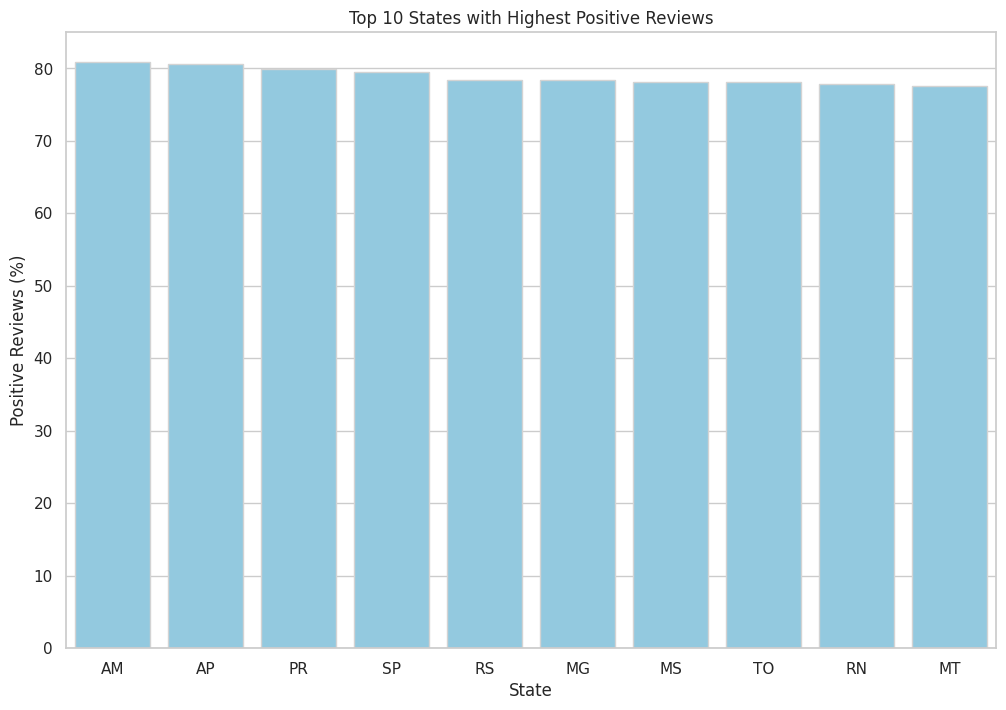

In [128]:
consulta = text('''
SELECT
  c.customer_state AS state,
  AVG(r.review_score) AS avg_review_score,
  ROUND(100.0 * SUM(CASE WHEN r.review_score >= 4 THEN 1 ELSE 0 END) / COUNT(r.review_id), 2) AS positive_reviews
FROM order_reviews r
JOIN orders o ON r.order_id = o.order_id
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY state
ORDER BY  positive_reviews DESC
LIMIT 10;
''')

avg_review_state_top10_mayor = pd.read_sql_query(consulta, conn)

display(avg_review_state_top10_mayor)


# Ordenar el DataFrame por el porcentaje de reviews positivas en orden descendente
avg_review_state_top10_mayor_sorted = avg_review_state_top10_mayor.sort_values(by="positive_reviews", ascending=False)

# Gráfico de barras para mostrar el porcentaje de reviews positivas por estado
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="state", y="positive_reviews", data=avg_review_state_top10_mayor_sorted, color="skyblue", edgecolor="lightgray")
ax.set_xlabel("State")
ax.set_ylabel("Positive Reviews (%)")
plt.title("Top 10 States with Highest Positive Reviews")

# Configuración del gráfico interactivo de dispersión
fig = px.scatter(avg_review_state_top10_mayor_sorted, x="state", y="avg_review_score", size="positive_reviews", color="positive_reviews",
                 hover_name="state", hover_data=["avg_review_score"], text="positive_reviews",
                 labels={"avg_review_score": "Average Review Score", "positive_reviews": "Positive Reviews (%)"},
                 color_continuous_scale='bluyl')

# Configuración del diseño del gráfico
fig.update_traces(textposition="top center")
fig.update_layout(title="Average Review Score vs Positive Reviews by State",
                  xaxis_title="State", yaxis_title="Average Review Score",
                  showlegend=False)

fig.show()



Los 10 estados con mayor puntuación promedio y el porcentaje de comentarios positivos por parte de los clientes son Amapá, Amazonas, Paraná, São Paulo, Rio Grande do Sul, Minas Gerais, Mato Grosso do Sul, Tocantins, Rio Grande do Norte y Mato Grosso. Estos estados tienen una puntuación promedio superior a 4.1 y un porcentaje de comentarios positivos superior al 77%. Esto podría indicar que los clientes de estos estados están más satisfechos con el servicio y la calidad de los productos que reciben.

### 9. Top 10 categorias con mayor puntuación promedio y el porcentaje de comentarios positivos


In [131]:
consulta = text('''
SELECT
  t.product_category_name_english AS category,
  ROUND(AVG(r.review_score),2) AS avg_review_score,
  ROUND(100.0 * SUM(CASE WHEN r.review_score >= 4 THEN 1 ELSE 0 END) / COUNT(r.review_id), 2) AS positive_reviews
FROM order_reviews r
JOIN orders o ON r.order_id = o.order_id
JOIN customers c ON o.customer_id = c.customer_id
JOIN order_items i ON o.order_id = i.order_id
JOIN products p ON i.product_id = p.product_id
JOIN product_category_name_translation t ON p.product_category_name = t.product_category_name
GROUP BY category
ORDER BY positive_reviews DESC
LIMIT 10;
''')

avg_review_category_top10_mayor = pd.read_sql_query(consulta, conn)

display(avg_review_category_top10_mayor)

avg_review_category_top10_mayor_sorted = avg_review_category_top10_mayor.sort_values(by="positive_reviews", ascending=False)

# Crear un gráfico de barras interactivo utilizando Plotly
fig = px.bar(
    avg_review_category_top10_mayor_sorted,
    x="category",
    y="positive_reviews",
    color="avg_review_score",
    color_continuous_scale="bluyl",
    title="Top 10 Categories by Positive Reviews",
    labels={"category": "Category", "positive_reviews": "Positive Reviews (%)", "avg_review_score": "Average Review Score"}
)

# Configurar el diseño del gráfico
fig.update_layout(
    xaxis=dict(title=None),
    yaxis=dict(title=None),
    coloraxis_colorbar=dict(title="Average Review Score"),
    plot_bgcolor='rgba(0,0,0,0)',
    showlegend=False
)

fig.show()


,category,avg_review_score,positive_reviews
0,cds_dvds_musicals,4.64,92.86
1,costruction_tools_tools,4.44,90.91
2,books_general_interest,4.45,87.80
3,fashion_childrens_clothes,4.50,87.50
4,flowers,4.42,87.10
5,books_technical,4.37,85.34
6,books_imported,4.40,85.00
7,small_appliances_home_oven_and_coffee,4.30,84.21
8,fashion_sport,4.26,83.87
9,luggage_accessories,4.32,83.73


Las 10 categorías de producto con mayor puntuación promedio y el porcentaje de comentarios positivos por parte de los clientes son cds_dvds_musicals, costruction_tools_tools, books_general_interest, fashion_childrens_clothes, flowers, books_technical, books_imported, small_appliances_home_oven_and_coffee, fashion_sport y luggage_accessories. Estas categorías tienen una puntuación promedio superior a 4.2 y un porcentaje de comentarios positivos superior al 83%.

### 10. Tipo de pago más utilizado por estado

In [138]:
consulta = text('''
SELECT
  state,
  payment_type
FROM (
  SELECT
    c.customer_state AS state,
    p.payment_type AS payment_type,
    COUNT(DISTINCT p.order_id) AS num_orders,
    ROW_NUMBER() OVER (PARTITION BY c.customer_state ORDER BY COUNT(DISTINCT p.order_id) DESC) AS rank_by_state
  FROM order_payments p
  JOIN orders o ON p.order_id = o.order_id
  JOIN customers c ON o.customer_id = c.customer_id
  GROUP BY c.customer_state, p.payment_type
) AS ranks
WHERE rank_by_state = 1
ORDER BY state;


''')

payment_type_state  = pd.read_sql_query(consulta, conn)

display(payment_type_state)


,state,payment_type
0,AC,credit_card
1,AL,credit_card
2,AM,credit_card
3,AP,credit_card
4,BA,credit_card
5,CE,credit_card
6,DF,credit_card
7,ES,credit_card
8,GO,credit_card
9,MA,credit_card


El tipo de pago más utilizado por estado es la tarjeta de crédito, que se usa en todos los estados del país. Esto podría indicar que la tarjeta de crédito es el método de pago más conveniente, seguro y accesible para los clientes. También podría reflejar una preferencia por el pago a plazos o la acumulación de puntos o beneficios.

### 11. Promedio, maximo y minimo del precio del producto y promedio del precio de envío ordenados por Top 5 de mayor y menor precio de producto segun categoria




In [142]:
consulta = text('''
WITH category_stats AS (
  SELECT
    t.product_category_name_english AS category,
    ROUND(AVG(i.price), 2) AS avg_price,
    ROUND(AVG(i.freight_value), 2) AS avg_freight_value,
    MIN(i.price) AS min_price,
    MAX(i.price) AS max_price,
    ROW_NUMBER() OVER (ORDER BY AVG(i.price) DESC) AS price_rank,
    ROW_NUMBER() OVER (ORDER BY AVG(i.price)) AS price_rank_reverse
  FROM order_items i
  JOIN products p ON i.product_id = p.product_id
  JOIN product_category_name_translation t ON p.product_category_name = t.product_category_name
  GROUP BY category
)
SELECT category, avg_price, min_price, max_price, avg_freight_value
FROM category_stats
WHERE price_rank <= 5 OR price_rank_reverse <= 5
ORDER BY avg_price DESC;
''')

avg_price_category = pd.read_sql_query(consulta, conn)
display(avg_price_category)



import plotly.graph_objects as go
import pandas as pd

# Supongamos que tienes los resultados de la consulta en un DataFrame llamado 'result'

# Crear una figura de barras agrupadas
fig = go.Figure()

# Agregar las barras agrupadas para cada categoría
fig.add_trace(go.Bar(
    x=avg_price_category['category'].head(5),  # Primeros 5 ejemplos (mayor promedio de precio)
    y=avg_price_category['avg_price'].head(5),
    name='Top 5 Average Price',
    marker_color='skyblue'
))
fig.add_trace(go.Bar(
    x=avg_price_category['category'].tail(5),  # Últimos 5 ejemplos (menor promedio de precio)
    y=avg_price_category['avg_price'].tail(5),
    name='Bottom 5 Average Price',
    marker_color='salmon'
))

# Configurar el diseño del gráfico
fig.update_layout(
    title='Top 5 and Bottom 5 Average Prices by Category',
    xaxis_tickangle=-45,
    yaxis=dict(title='Average Price'),
    barmode='group',
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)

# Agregar interactividad al gráfico
fig.update_traces(hovertemplate='<b>%{x}</b><br>AVG price: %{y}')

# Mostrar el gráfico interactivo
fig.show()



,category,avg_price,min_price,max_price,avg_freight_value
0,computers,1098.34,34.50,6729.00,48.45
1,small_appliances_home_oven_and_coffee,624.29,10.19,2899.00,36.16
2,home_appliances_2,476.12,13.90,2350.00,44.54
3,agro_industry_and_commerce,342.12,12.99,2990.00,27.56
4,musical_instruments,281.62,4.90,4399.87,27.41
5,food_drink,54.60,6.50,699.90,16.22
6,cds_dvds_musicals,52.14,45.00,65.00,16.07
7,diapers_and_hygiene,40.19,25.00,139.89,14.71
8,flowers,33.64,15.60,65.90,14.81
9,home_comfort_2,25.34,12.90,219.99,13.68


In [ ]:
# Cerrar sesion
conn.close()

Las 5 categorías con mayor precio promedio del producto son computers, small_appliances_home_oven_and_coffee, home_appliances_2, agro_industry_and_commerce y musical_instruments. Estas categorías tienen un precio promedio superior a 280 reales y un precio máximo superior a 2000 reales. Estas categorías podrían tener productos de mayor complejidad, calidad o demanda, lo que justifica su alto precio.

Las 5 categorías con menor precio promedio del producto son home_comfort, flowers, diapers_and_hygiene, cds_dvds_musicals y food_drink. Estas categorías tienen un precio promedio inferior a 55 pesrealesos y un precio máximo inferior a 700 reales. Estas categorías podrían tener productos de menor complejidad, calidad o demanda, lo que explica su bajo precio.

El precio promedio del envío no parece estar relacionado con el precio del producto, ya que hay categorías con precios altos y bajos que tienen un valor de envío similar. El valor del envío podría depender más de otros factores como el peso, el tamaño o la distancia del producto.

# Conclusión

En este análisis se exploraron diferentes aspectos de los datos de ventas de una empresa de comercio electrónico, tales como las categorías de producto, los tipos de pago, los estados, el tiempo de entrega y la satisfacción de los clientes. Se encontraron algunos hallazgos relevantes, como:

- La categoría de producto que más se vendió por cantidad y por precio total fue health_beauty, seguida por watches_gifts y bed_bath_table.

- El tipo de pago más utilizado por los clientes fue la tarjeta de crédito, que
se usó en todos los estados del país.

- El estado con más clientes fue São Paulo, con el 42.4% del total, seguido por Rio de Janeiro y Minas Gerais. El estado con el menor tiempo promedio de entrega fue también São Paulo, con 8.76 días, mientras que el estado con el mayor tiempo promedio de entrega fue Roraima, con 29.39 días.

- El tiempo promedio de entrega del producto por mes mostró una tendencia decreciente desde el año 2016 hasta el año 2018, con algunas fluctuaciones estacionales. El mes con más pedidos fue noviembre de 2017, con 7544 pedidos, mientras que el mes con menos pedidos fue diciembre de 2016, con solo un pedido.

- Las categorías de producto con mayor puntuación promedio y el porcentaje de comentarios positivos por parte de los clientes fueron cds_dvds_musicals, costruction_tools_tools, books_general_interest, fashion_childrens_clothes y flowers. Estas categorías podrían tener productos de menor tamaño, peso o fragilidad, lo que facilita su transporte y manipulación.

- Las categorías de producto con mayor precio promedio fueron computers, small_appliances_home_oven_and_coffee, home_appliances_2, agro_industry_and_commerce y musical_instruments. Estas categorías podrían tener productos de mayor complejidad, calidad o demanda, lo que justifica su alto precio.